# Deterministic SEMHIRF Model

## 1. Packages, Imports

In [22]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import mpld3
mpld3.enable_notebook()
import numpy as np

## 2. Model without Lockdown

In [28]:
#plotters for model

#all compartments
def plotmodel11(t, S, E, M, H, I, R, F):
    f, ax = plt.subplots(1,1,figsize=(8,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'r', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, M, 'c', alpha=0.7, linewidth=2, label='Mild')
    ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalised')
    ax.plot(t, I, 'm', alpha=0.7, linewidth=2, label='Intensive Care')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, F, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S + E + M + H + I + R + F, 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.title("Lockdown when I compartment surpasses threshold")
    ax.set_xlabel('Time (days)')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
       # ax.spines[spine].set_visible(False)
    plt.savefig('fig.png', dpi=150)
    plt.show();
    

#infected compartments
def plotmodel12(t, S, E, M, H, I, R, F):
    f, ax = plt.subplots(1,1,figsize=(8,4))
   
    ax.plot(t, E, 'r', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, M, 'c', alpha=0.7, linewidth=2, label='Mild')
    ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalised')
    ax.plot(t, I, 'm', alpha=0.7, linewidth=2, label='Intensive Care')
    
    ax.plot(t, F, 'k', alpha=0.7, linewidth=2, label='Dead')
    
    plt.title("Lockdown when I compartment surpasses threshold")
    ax.set_xlabel('Time (days)')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
        #ax.spines[spine].set_visible(False)
    plt.savefig('sfig.png', dpi=150)
    plt.show();

#H, I compartments
def plotmodel13(t, S, E, M, H, I, R, F):
    f, ax = plt.subplots(1,1,figsize=(8,4))
   
    ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalised')
    ax.plot(t, I, 'm', alpha=0.7, linewidth=2, label='Intensive Care')
    
    plt.title("Lockdown when I compartment surpasses threshold")
    ax.set_xlabel('Time (days)')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
        #ax.spines[spine].set_visible(False)
    plt.savefig('bfig.png', dpi=150)
    plt.show();

In [29]:
#diff eq
def seirmodel(y, t, N, beta_M, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F):
    S, E, M, H, I, R, F = y
    dSdt = -(beta_M * M + beta_H * H + beta_I * I)* S / N
    dEdt = (beta_M * M + beta_H * H + beta_I * I)* S / N - E / t_EM
    dMdt = E / t_EM - gamma_M * M - p_H * M / t_MH
    dHdt = p_H * M / t_MH - gamma_H * H - p_I * H / t_HI
    dIdt = p_I * H / t_HI - gamma_I * I - p_F * I / t_IF
    
    dRdt = gamma_M * M + gamma_I * I + gamma_H * H
    dFdt = p_F * I / t_IF
    return dSdt, dEdt, dMdt, dHdt, dIdt, dRdt, dFdt 
    

In [30]:
#assumptions on params
N = 9_304_016
R_0_start= 3.85

R_0_end= 0.25
gamma_M = 1/7
gamma_H = 1/7
gamma_I = 1/7
beta_H = 0.15
beta_I = 0.15
beta_M= R_0_start*gamma_M
beta_ML= R_0_end*gamma_M
t_EM = 5.1
t_MH = 6.9
t_HI = 4.5
t_IF = 6.1
p_H= 0.1
p_I= 0.15
p_F= 0.5

#initial conditions: one exposed
S0, E0, M0, H0, I0, R0, F0 = N-1, 1, 0, 0, 0, 0, 0  

In [31]:

t = np.linspace(0, 154,155) 
y0 = S0, E0, M0, H0, I0, R0, F0 

# Integrate the SIR equations over the time grid, t.
ret = odeint(seirmodel, y0, t, args=(N, beta_M, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F))
S, E, M, H, I, R, F = ret.T

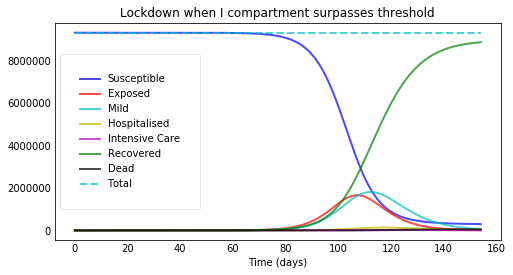

In [32]:
plotmodel11(t, S, E, M, H, I, R, F)


In [75]:
#plotters for cyclic lockdowns, eg. L=[3, 4] 
def plotmodel(t, S, E, M, H, I, R, F, L=None):
    f, ax = plt.subplots(1,1,figsize=(8,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'r', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, M, 'c', alpha=0.7, linewidth=2, label='Mild')
    ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalised')
    ax.plot(t, I, 'm', alpha=0.7, linewidth=2, label='Intensive Care')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, F, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S + E + M + H + I + R + F, 'c--', alpha=0.7, linewidth=2, label='Total')
    
    ax.set_xlabel('Time (days)')
    
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
        
        
    if L is not None:
        plt.title("Lockdown is lifted completely")
        #plt.title("Lockdown continues")
        #plt.title("Lockdown after every {} days with duration of {} days".format(L[0], L[1]))
    plt.savefig('lfig.png')
    plt.show();    
        
def plotmodel3(t, S, E, M, H, I, R, F, L=None):
    f, ax = plt.subplots(1,1,figsize=(8,4))
    
    ax.plot(t, E, 'r', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, M, 'c', alpha=0.7, linewidth=2, label='Mild')
    ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalised')
    ax.plot(t, I, 'm', alpha=0.7, linewidth=2, label='Intensive Care')
    
    ax.plot(t, F, 'k', alpha=0.7, linewidth=2, label='Dead')
    
    
    ax.set_xlabel('Time (days)')
    
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    
        
        
    if L is not None:
        plt.title("Lockdown is lifted completely")
        #plt.title("Lockdown after every {} days with duration of {} days".format(L[0], L[1]))
        #plt.title("Lockdown continues")
    plt.savefig('dfig.png')
    plt.show();
    
def plotmodel4(t, S, E, M, H, I, R, F, L=None):
    f, ax = plt.subplots(1,1,figsize=(8,4))
    
    
    ax.plot(t, H, 'y', alpha=0.7, linewidth=2, label='Hospitalised')
    ax.plot(t, I, 'm', alpha=0.7, linewidth=2, label='Intensive Care')
    
    
    
    ax.set_xlabel('Time (days)')
    
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    
        
        
    if L is not None:
        plt.title("Lockdown is lifted completely")
        #plt.title("Lockdown continues")
        #plt.title("Lockdown after every {} days with duration of {} days".format(L[0], L[1]))
    plt.savefig('odfig.png')
    plt.show();

In [76]:
#diff eq. for changing R_0
def seirmodel2(y, t, N, beta_M, beta_ML, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F):
    S, E, M, H, I, R, F = y
    dSdt = -(beta_R0M(t, L) * M + beta_H * H + beta_I * I)* S / N
    dEdt = (beta_R0M(t, L) * M + beta_H * H + beta_I * I)* S / N - E / t_EM
    dMdt = E / t_EM - gamma_M * M - p_H * M / t_MH
    dHdt = p_H * M / t_MH - gamma_H * H - p_I * H / t_HI
    dIdt = p_I * H / t_HI - gamma_I * I - p_F * I / t_IF
    
    dRdt = gamma_M * M + gamma_I * I + gamma_H * H
    dFdt = p_F * I / t_IF
    return dSdt, dEdt, dMdt, dHdt, dIdt, dRdt, dFdt 

In [77]:
#params
N = 9_304_016
R_0_start= 3.85
R_0_end= 0.30000000000000004
gamma_M = 1/7
gamma_H = 1/7
gamma_I = 1/7
beta_H = 0.15
beta_I = 0.15
beta_M= R_0_start*gamma_M
beta_ML= R_0_end*gamma_M
t_EM = 5.1
#t_MR = 12
t_MH = 6.9
t_HI = 4.5
t_IF = 6.1
p_H= 0.1
p_I= 0.15
p_F= 0.5




#R0 of hospitalised and intensive care people isn't affected by lockdown (we suppose that they stay home/in hospital anyway)

L=[4, 10]
def beta_R0M(t, L):
    m = L[0]+L[1]
    good = list(range(1, m+1))
    if (t < 76):
        return beta_M
    elif(t<154):
        return beta_ML
    elif(int(t)%m > L[0] or int(t)%m == 0):
        return beta_ML
    #so R0 is 0.9
    else:
        return beta_M

# initial conditions: one exposed
S0, E0, M0, H0, I0, R0, F0 = N-1, 1, 0, 0, 0, 0, 0  

In [78]:
t = np.linspace(0, 199,200) # Grid of time points (in days)
y0 = S0, E0, M0, H0, I0, R0, F0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(seirmodel2, y0, t, args=(N, beta_M, beta_ML, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F))
S, E, M, H, I, R, F = ret.T

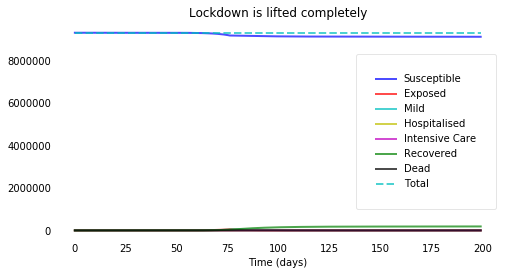

In [79]:
plotmodel(t, S, E, M, H, I, R, F, L)


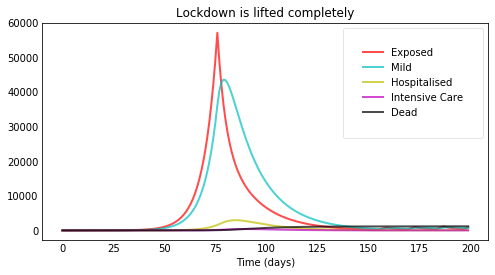

In [80]:
plotmodel3(t, S, E, M, H, I, R, F, L)

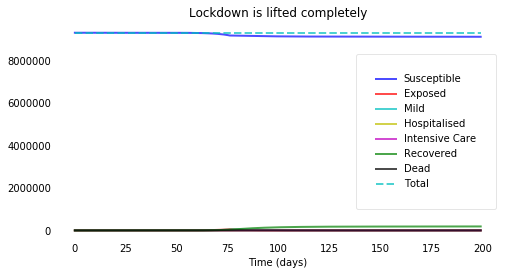

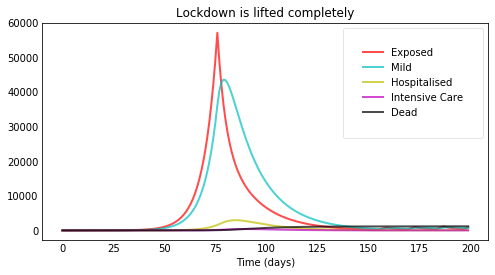

In [81]:
#beta for lockdown continuing forever
L=[4, 10]
def beta_R0M(t, L):
    m = L[0]+L[1]
    good = list(range(1, m+1))
    if (t < 76):
        return beta_M
    elif(int(t)%m > L[0] or int(t)%m == 0):
        return beta_ML
    
    else:
        return beta_M
plotmodel(t, S, E, M, H, I, R, F, L)
plotmodel3(t, S, E, M, H, I, R, F, L)

## Forecasting

In [82]:
#gettig last states

states = [S[154], E[154],M[154],H[154],I[154],R[154],F[154]]
print(states)
9023910.458146702

[9119807.673283504, 225.50714017307817, 466.23607670754393, 59.43919601595392, 12.206103621546124, 182287.61075601738, 1157.327443966338]


9023910.458146702

### Lockdown forever

In [83]:
def seirmodel2(y, t, N, beta_M, beta_ML, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F):
    S, E, M, H, I, R, F = y
    dSdt = -(beta_R0MN(t, L) * M + beta_H * H + beta_I * I)* S / N
    dEdt = (beta_R0MN(t, L) * M + beta_H * H + beta_I * I)* S / N - E / t_EM
    dMdt = E / t_EM - gamma_M * M - p_H * M / t_MH
    dHdt = p_H * M / t_MH - gamma_H * H - p_I * H / t_HI
    dIdt = p_I * H / t_HI - gamma_I * I - p_F * I / t_IF
    
    dRdt = gamma_M * M + gamma_I * I + gamma_H * H
    dFdt = p_F * I / t_IF
    return dSdt, dEdt, dMdt, dHdt, dIdt, dRdt, dFdt 

In [84]:
N = 9_304_016
R_0_start= 3.85

R_0_end= 0.25
gamma_M = 1/7
gamma_H = 1/7
gamma_I = 1/7
beta_H = 0.15
beta_I = 0.15
beta_M= R_0_start*gamma_M
beta_ML= R_0_end*gamma_M
t_EM = 5.1
#t_MR = 12
t_MH = 6.9
t_HI = 4.5
t_IF = 6.1
p_H= 0.1
p_I= 0.15
p_F= 0.5




L=[5, 0]

def beta_R0MN(t, L):
    m = L[0]+L[1]
    good = list(range(1, m+1))

    if(int(t)%m > L[0] or int(t)%m == 0):
        return beta_ML
    
    else:
        return beta_M
#R0 of hospitalised and intensive care people isn't affected by lockdown




S0, E0, M0, H0, I0, R0, F0 = 9119807.673283504, 225.50714017307817, 466.23607670754393, 59.43919601595392, 12.206103621546124, 182287.61075601738, 1157.327443966338

In [85]:
t = np.linspace(0, 199,200) # Grid of time points (in days)
y0 = S0, E0, M0, H0, I0, R0, F0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(seirmodel2, y0, t, args=(N, beta_M, beta_ML, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F))
S, E, M, H, I, R, F = ret.T

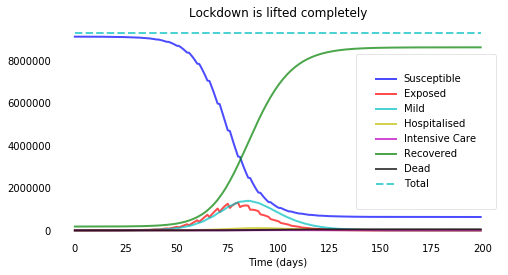

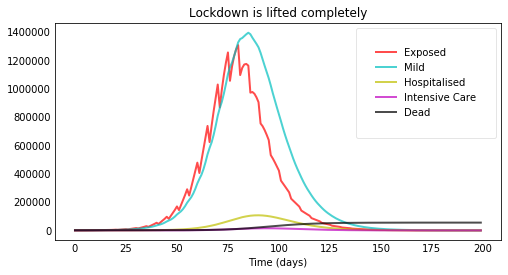

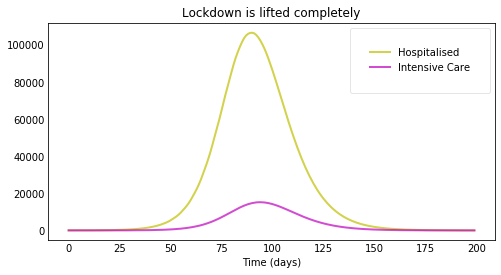

In [86]:
plotmodel(t, S, E, M, H, I, R, F, L)
plotmodel3(t, S, E, M, H, I, R, F, L)
plotmodel4(t, S, E, M, H, I, R, F, L)

### Lockdown when epidemic resourges

In [122]:
def beta(t):
    if (t<20):
        return beta_M
    
    elif (t<60):

        return beta_ML
   
    elif (t<77):
        return beta_M
    else:
        return beta_ML

In [123]:
def seirmodel3(y, t, N, beta_M, beta_ML, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F):
    S, E, M, H, I, R, F = y
    dSdt = -(beta(t) * M + beta_H * H + beta_I * I)* S / N
    dEdt = (beta(t) * M + beta_H * H + beta_I * I)* S / N - E / t_EM
    dMdt = E / t_EM - gamma_M * M - p_H * M / t_MH
    dHdt = p_H * M / t_MH - gamma_H * H - p_I * H / t_HI
    dIdt = p_I * H / t_HI - gamma_I * I - p_F * I / t_IF
    
    dRdt = gamma_M * M + gamma_I * I + gamma_H * H
    dFdt = p_F * I / t_IF
    return dSdt, dEdt, dMdt, dHdt, dIdt, dRdt, dFdt 

In [124]:
N = 9_304_016
R_0_start= 3.85

R_0_end= 0.25
gamma_M = 1/7
gamma_H = 1/7
gamma_I = 1/7
beta_H = 0.15
beta_I = 0.15
beta_M= R_0_start*gamma_M
beta_ML= R_0_end*gamma_M
t_EM = 5.1
#t_MR = 12
t_MH = 6.9
t_HI = 4.5
t_IF = 6.1
p_H= 0.1
p_I= 0.15
p_F= 0.5

S0, E0, M0, H0, I0, R0, F0 = 9119807.673283504, 225.50714017307817, 466.23607670754393, 59.43919601595392, 12.206103621546124, 182287.61075601738, 1157.327443966338



In [125]:
t = np.linspace(0, 199,200) # Grid of time points (in days)
y0 = S0, E0, M0, H0, I0, R0, F0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(seirmodel3, y0, t, args=(N, beta_M, beta_ML, beta_H, beta_I, gamma_M, gamma_H, gamma_I, t_EM, t_MH, t_HI, t_IF, p_H, p_I, p_F))
S, E, M, H, I, R, F = ret.T

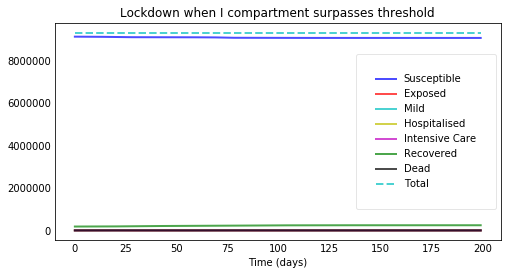

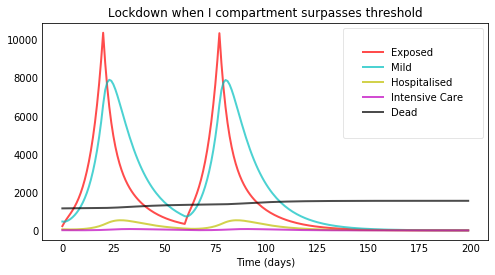

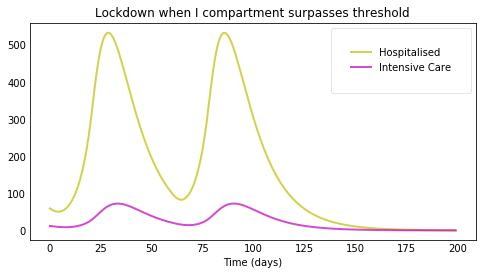

In [126]:
plotmodel11(t, S, E, M, H, I, R, F)
plotmodel12(t, S, E, M, H, I, R, F)
plotmodel13(t, S, E, M, H, I, R, F)